In [1]:
import pandas as pd
pd.set_option('max_colwidth', 80)
from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import spacy

/anaconda3/envs/MT/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/anaconda3/envs/MT/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/anaconda3/envs/MT/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence


In [2]:
def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d

In [10]:
def clean_twitter(s):
    s = sub(r"([@#&]\w+)|https\S+|RT|:|;|\n|=|\w/|@", '', s) # Filter out hashtag, mentions, RTs, line-break, urls
    s = s.encode('ascii', 'ignore').decode('ascii')
    s = s.lower()
    return s

In [ ]:
nlp_en = spacy.load('en') 

def clean_twitter_spacy(s):
    s = sub(r"([@#&]\w+)|https\S+|RT|:|;|\n|=|\w/|@", '', s) # Filter out hashtag, mentions, RTs, line-break, urls
    s = s.encode('ascii', 'ignore').decode('ascii')
    s = s.lower()
    s = nlp_en(s)
    return s

In [11]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label
X.head()

0    RT @LilMissRightie: Here's CNN on Sharia law. You can be stoned or have your...
1    RT @NetworksManager: LOOK obama Clinton cronies ILLEGALLY arm &amp; train mu...
2    RT @GrrrGraphics: #ThrowbackThursday #BenGarrison #cartoon from 2013 #Obama ...
3    RT @PeterTownsend7: Say 'Islam is peace', or else!  #trump #maga #isis #tcot...
4    RT @ToddDracula: @realDonaldTrump All aboard the Trump Train! #ChooChoo 🚂 ht...
Name: tweet, dtype: object

In [12]:
X_clean = X.map(clean_twitter)
X_clean.head()

0      here's cnn on sharia law. you can be stoned or have your hands cut off, bu...
1      look obama clinton cronies illegally arm  train muslims terrorist includin...
2                                                       from 2013  gets crowned     
3                                             say 'islam is peace', or else!        
4                                                     all aboard the trump train!   
Name: tweet, dtype: object

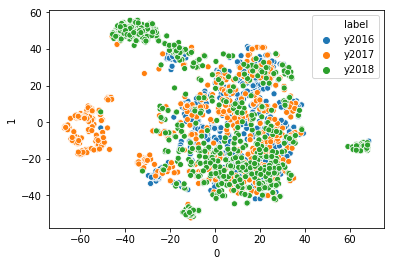

In [6]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

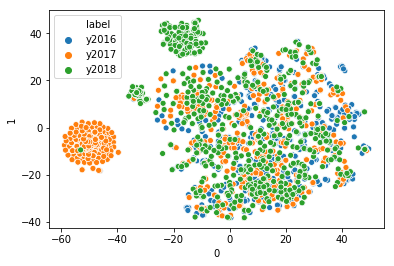

In [7]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

In [8]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way?  

from sklearn.feature_extraction import text

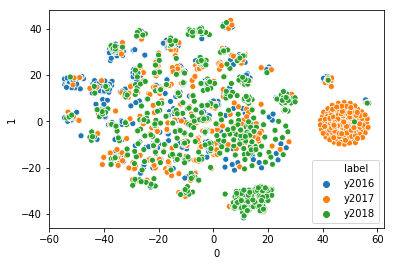

In [9]:
# add implicit stopwords
my_stop_words = text.ENGLISH_STOP_WORDS.union(["online"])

tfidf_vectorizer = TfidfVectorizer(max_df=0.80, min_df=3, max_features=1000, stop_words=my_stop_words)
# TF-IDF feature matrix
V = tfidf_vectorizer.fit_transform(X.map(clean_twitter))
ax, d = plot_embedding(V, y)